In [44]:
# Importating libraries

import numpy as np
from keras import models, losses, layers, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
#load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter = ",")
dataset.shape

(768, 9)

In [3]:
#split data
X = dataset[:, :-1]
y = dataset[:, -1]
mean = X.mean(axis = 0)
std = X.std(axis = 0)
X = (X - mean)/std

1. Basic neural networks

In [4]:
np.random.seed(1)


# create model
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_dim = 8))
model.add(layers.Dense(16, activation = "exponential"))
model.add(layers.Dense(1, activation = "sigmoid"))

# compile model
model.compile(optimizer='rmsprop',loss=losses.BinaryCrossentropy(),metrics=[metrics.BinaryAccuracy()])

# fit model
hist = model.fit(X, y, validation_split = 0.33, epochs = 30, batch_size = 20)

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.3555 - loss: 0.9648 - val_binary_accuracy: 0.5118 - val_loss: 0.7228
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5654 - loss: 0.6790 - val_binary_accuracy: 0.7205 - val_loss: 0.5981
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6411 - loss: 0.6091 - val_binary_accuracy: 0.7165 - val_loss: 0.5408
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6983 - loss: 0.5470 - val_binary_accuracy: 0.7362 - val_loss: 0.5169
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6742 - loss: 0.5960 - val_binary_accuracy: 0.7402 - val_loss: 0.4979
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7235 - loss: 0.5234 - val_binary_accuracy: 0.7520 - val_loss: 0.4914
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7215 - loss: 0.5158 - val_binary_accuracy: 0.7638 - val_loss: 0.4827
Epoch 8/30
26/26 ━━━

Text(0.5, 1.0, 'Training and validation loss')

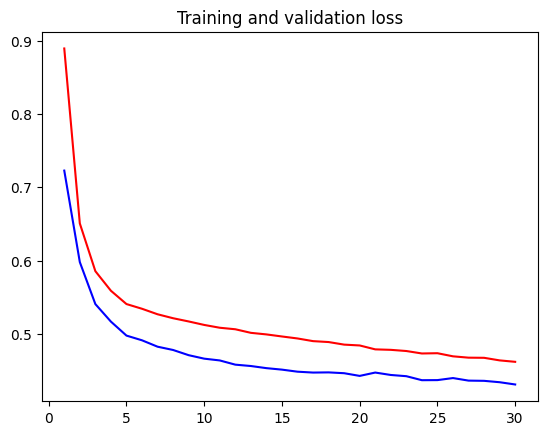

In [5]:
# plot loss and validation loss curves

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
ep = range(1, len(loss) + 1)
plt.plot(ep, loss, "r-")
plt.plot(ep, val_loss, "b-")
plt.title("Training and validation loss")

2. Neural networks with K-Fold validation

In [6]:
df = pd.DataFrame()

In [16]:
# initialize parameters
params = {"N1" : 32, "N2" : 32, "act1" : "relu", "act2" : "relu", "opt" : "adam", "loss" : losses.BinaryCrossentropy(),
          "epochs" : 200, "batch_size" : 5}

def create_model(X, y) :
    """create and return model"""

    # create model
    model = models.Sequential()
    model.add(layers.Dense(params["N1"], activation = params["act1"], input_dim = 8))
    model.add(layers.Dense(params["N2"], activation = params["act2"]))
    # model.add(layers.Dense(params["N3"], activation = params["act3"]))
    model.add(layers.Dense(1, activation = "sigmoid"))

    # compile model
    model.compile(optimizer=params["opt"],loss=params["loss"],metrics=["accuracy"])

    # fit model
    model.fit(X, y, validation_split = 0, epochs = params["epochs"], batch_size = params["batch_size"], verbose = 0)

    return model

In [17]:
# split data into 10 folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

# list that will store the results
cv_score = []

for train_index, test_index in kfold.split(X, y) :
    # create model
    model = create_model(X[train_index], y[train_index])
    
    # evaluate the model
    score = model.evaluate(X[test_index], y[test_index], verbose = 0)
    print(model.metrics_names[1], score[1]*100)
    cv_score.append(score[1]*100)

params["accuracy"] = np.mean(cv_score)
df = pd.concat([df, pd.Series(params)], axis = 1)
print("average accuracy and standard deviation:", np.mean(cv_score), np.std(cv_score))
df

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics 62.337660789489746
compile_metrics 67.53246784210205
compile_metrics 74.02597665786743
compile_metrics 71.42857313156128
compile_metrics 70.1298713684082
compile_metrics 76.6233742237091
compile_metrics 84.41558480262756
compile_metrics 74.02597665786743
compile_metrics 68.42105388641357
compile_metrics 63.15789222717285
average accuracy and standard deviation: 71.20984315872192 6.20985746388507


,0,0,0,0
N1,12,12,32,32
N2,16,16,16,32
N3,8,NaN,NaN,NaN
act1,relu,relu,relu,relu
act2,exponential,exponential,relu,relu
act3,relu,NaN,NaN,NaN
opt,adam,adam,adam,adam
loss,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...
epochs,100,50,50,200
batch_size,10,5,5,5


3. WITH CALLBACKS

In [66]:
df2 = pd.DataFrame()

In [67]:
X_kfold, X_test, y_kfold, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 3)

In [69]:
n_folds = 9

# initialize parameters
params = {"N1" : 24, "N2" : 12, "N3" : 16, "act1" : "relu", "act2" : "relu", "act3" : "exponential","opt" : "adam", "loss" : losses.BinaryCrossentropy(),
          "epochs" : 100, "batch_size" : 20}

def create_model(X_t, y_t, X_v, y_v, count) :
    """create and return model"""

    callbacks = [
        EarlyStopping(monitor = "val_accuracy", patience = 20),
        ModelCheckpoint(
            filepath = "my_best_model" + str(count) + ".keras",
            monitor = "val_accuracy",
            mode = "max",
            save_best_only = True,
            verbose = 1
        )
    ]

    # create model
    model = models.Sequential()
    model.add(layers.Dense(params["N1"], activation = params["act1"], input_dim = 8))
    model.add(layers.Dense(params["N2"], activation = params["act2"]))
    model.add(layers.Dense(params["N3"], activation = params["act3"]))
    model.add(layers.Dense(1, activation = "sigmoid"))

    # compile model
    model.compile(optimizer=params["opt"],loss=params["loss"],metrics=["accuracy"])

    # fit model
    model.fit(X_t, y_t, validation_data = (X_v, y_v), epochs = params["epochs"], batch_size = params["batch_size"], verbose = 0, callbacks = callbacks)

    return model

# split data into 10 folds
kfold = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 0)

# list that will store the results
cv_score = []
i = 0
for train_index, test_index in kfold.split(X_kfold, y_kfold) :
    # create model
    model = create_model(X_kfold[train_index], y_kfold[train_index], X_kfold[test_index], y_kfold[test_index], i)
    
    # evaluate the model
    score = model.evaluate(X_kfold[test_index], y_kfold[test_index], verbose = 0)
    print(model.metrics_names[1], score[1]*100)
    cv_score.append(score[1]*100)
    i += 1

params["accuracy"] = np.mean(cv_score)
df2 = pd.concat([df2, pd.Series(params)], axis = 1)
print("average accuracy and standard deviation:", np.mean(cv_score), np.std(cv_score))
df2

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.69565, saving model to my_best_model0.keras

Epoch 2: val_accuracy did not improve from 0.69565

Epoch 3: val_accuracy improved from 0.69565 to 0.73913, saving model to my_best_model0.keras

Epoch 4: val_accuracy did not improve from 0.73913

Epoch 5: val_accuracy improved from 0.73913 to 0.79710, saving model to my_best_model0.keras

Epoch 6: val_accuracy did not improve from 0.79710

Epoch 7: val_accuracy did not improve from 0.79710

Epoch 8: val_accuracy improved from 0.79710 to 0.81159, saving model to my_best_model0.keras

Epoch 9: val_accuracy did not improve from 0.81159

Epoch 10: val_accuracy did not improve from 0.81159

Epoch 11: val_accuracy improved from 0.81159 to 0.82609, saving model to my_best_model0.keras

Epoch 12: val_accuracy did not improve from 0.82609

Epoch 13: val_accuracy improved from 0.82609 to 0.84058, saving model to my_best_model0.keras

Epoch 14: val_accuracy did not improve from 0.84058

Epoch 15: val_acc

,0,0
N1,12,24
N2,12,12
act1,relu,relu
act2,sigmoid,relu
opt,adam,adam
loss,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...
epochs,100,100
batch_size,20,20
accuracy,77.846453,75.078147
N3,NaN,16


In [70]:
all_model = []
for i in range (n_folds) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [71]:
model_predict_moyenne = all_model[0].predict(X_test)

for i in range(1, n_folds) :
    model_predict_moyenne += all_model[i].predict(X_test)

model_predict_moyenne = np.round(model_predict_moyenne/10)

print("accuracy : ", 1 - (np.sum(np.abs(model_predict_moyenne[:, 0] - y_test))/len(y_test)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
accuracy :  0.7467532467532467
